In [40]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (Qobj, sesolve, ket2dm)

In [41]:
##define all of the parameters
Phi =  0
Phim = 0
Phig = 0
Delta0 = 0
Delta1 = 0
Delta2 = 0
Delta3 = 0
Alpha10 = 1 + 2/np.sqrt(3)
Alpha23 = 1
Alpha30 = np.exp(1j*Phi) * (2/np.sqrt(3)-1)
Alpha12 = 1
Alpha0 = Alpha12
Alpha1 = Alpha12
Alpha2 = Alpha23
Alpha3 = Alpha23
AlphaRFm = 0
AlphaRFg = 0

##define the basis states
Zero = Qobj([[1], [0], [0], [0]])
One = Qobj([[0], [1], [0], [0]])
Two = Qobj([[0], [0], [1], [0]])
Three = Qobj([[0], [0], [0], [1]])
Minus = (Alpha3 * One - Alpha1 * Three) / np.sqrt(Alpha1**2 + Alpha3**2)
Plus = (Alpha1 * One + Alpha3 * Three) / np.sqrt(Alpha1**2 + Alpha3**2)
MinusPrime = (Alpha2 * Zero - Alpha0 * Two) / np.sqrt(Alpha0**2 + Alpha2**2)
PlusPrime = (Alpha0 * Zero + Alpha2 * Two) / np.sqrt(Alpha0**2 + Alpha2**2)
Sx32 = Qobj([[1], [np.sqrt(3)], [np.sqrt(3)], [1]] / (2*np.sqrt(2)))

##define the Hamiltonian
H = Qobj([
    [Delta0, Alpha10, AlphaRFg * np.exp( 1j * Phig ), Alpha30 * np.exp( -1j * Phi )],
    [Alpha10, Delta1, Alpha12, AlphaRFm * np.exp( 1j * Phim )],
    [AlphaRFg * np.exp( -1j * Phig ), Alpha12, 0, Alpha23],
    [Alpha30 * np.exp( 1j * Phi ), AlphaRFm * np.exp( -1j * Phim ), Alpha23, Delta3]
])

In [46]:
#Simulate

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 1001)

#convert to density matrices
dmZero = ket2dm(Zero)
dmOne = ket2dm(One)
dmTwo = ket2dm(Two)
dmThree = ket2dm(Three)
dmMinus = ket2dm(Minus)
dmPlus = ket2dm(Plus)
dmMinusPrime = ket2dm(MinusPrime)
dmPlusPrime = ket2dm(PlusPrime)

dmStates = [dmZero,dmOne,dmTwo,dmThree,dmMinus,dmPlus,dmMinusPrime,dmPlusPrime]

Results = []
for i in range(np.size(dmStates)):
    Results.append(sesolve(H, Minus, tlist, e_ops=[dmStates[i]])) #finding the expectation value of dmStates[i]

#get an array of the probabilities of being in each state
Probs = []
for i in range(np.size(Results)):
    Probs.append(Results[i].expect[0])

ZeroPoints, OnePoints, TwoPoints, ThreePoints, MinusPoints, PlusPoints, MinusPrimePoints, PlusPrimePoints = Probs[0],Probs[1],Probs[2],Probs[3],Probs[4],Probs[5],Probs[6],Probs[7]

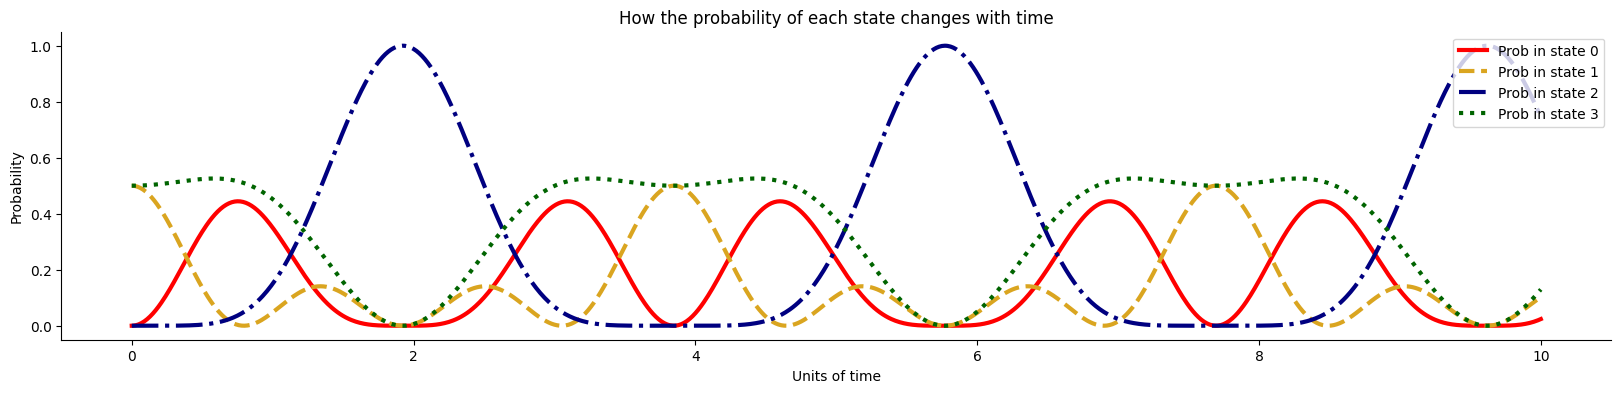

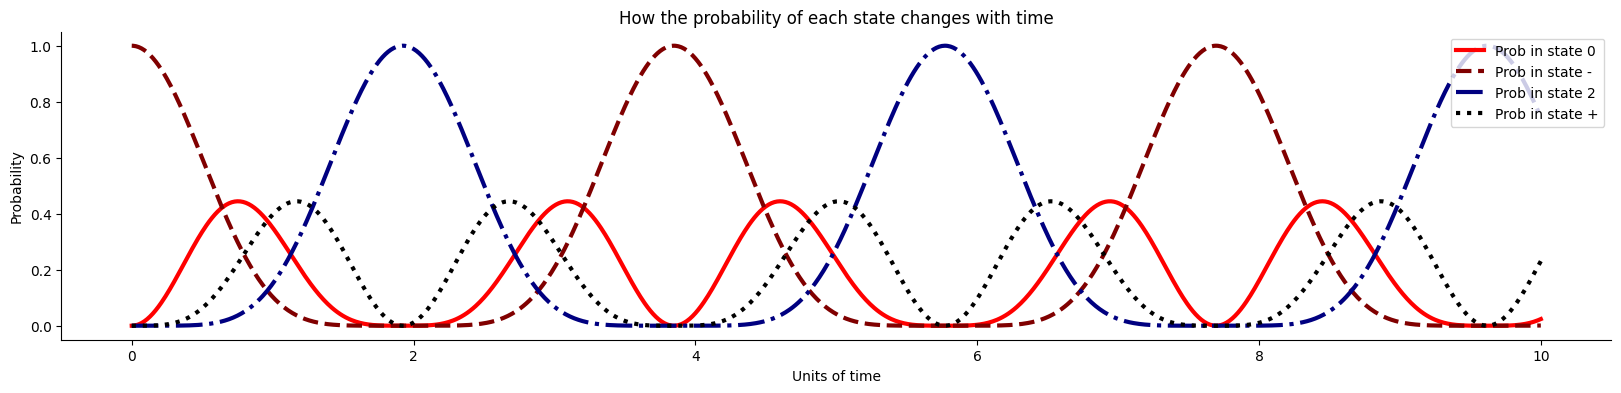

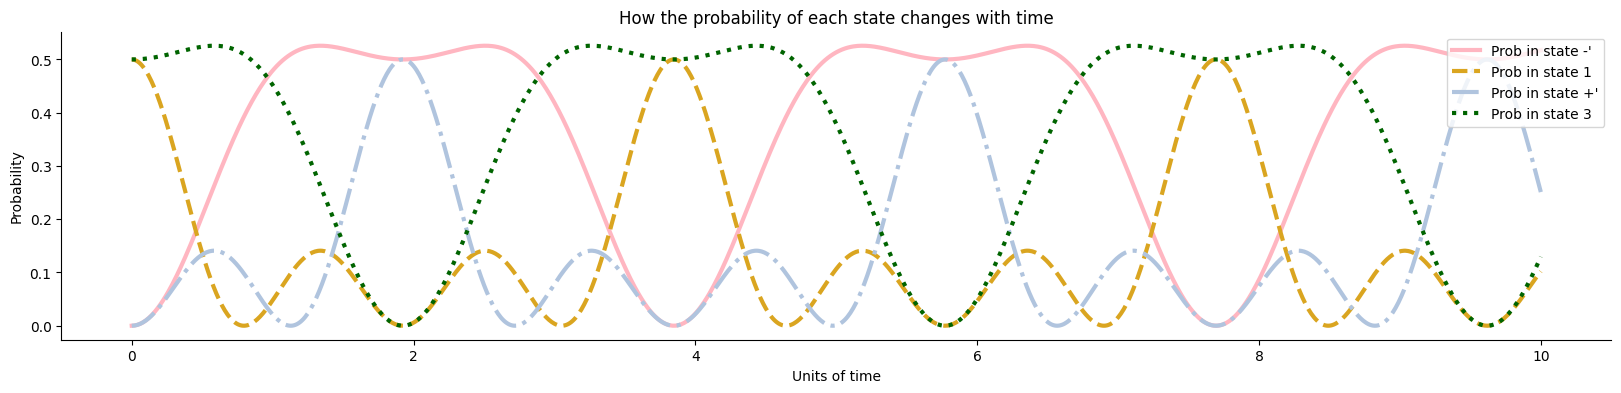

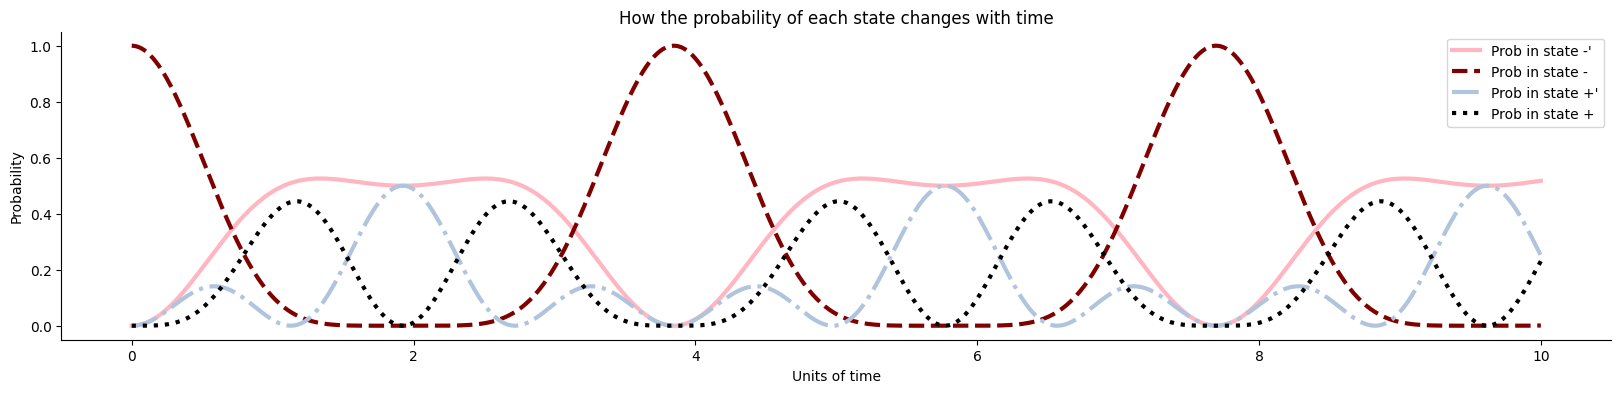

In [47]:
#define a function to plot graphs:
def Plot(Plots,Colours,Labels,Linestyles):
    plt.figure(figsize=(20,4))

    for i in range(0,np.size(Colours)):
        plt.plot(tlist,Plots[i], color=Colours[i], label = Labels[i], linestyle=Linestyles[i], linewidth = 3)
    
    # Set the plot free
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.legend(loc='upper right')
    plt.title('How the probability of each state changes with time')
    plt.ylabel('Probability')
    plt.xlabel('Units of time')
    plt.show()

#{0,1,2,3} basis
Plots1 = [ZeroPoints,OnePoints,TwoPoints,ThreePoints]
Colours1 = ['red','goldenrod','navy','darkgreen']
Labels1 = ['Prob in state 0','Prob in state 1','Prob in state 2','Prob in state 3']
Linestyles1 = ['-','--','-.',':']

#{0,-,2,+} basis
Plots2 = [ZeroPoints,MinusPoints,TwoPoints,PlusPoints]
Colours2 = ['red','maroon','navy','black']
Labels2 = ['Prob in state 0','Prob in state -','Prob in state 2','Prob in state +']
Linestyles2 = ['-','--','-.',':']

#{-',1,+',3} basis
Plots3 = [MinusPrimePoints,OnePoints,PlusPrimePoints,ThreePoints]
Colours3 = ['lightpink','goldenrod','lightsteelblue','darkgreen']
Labels3 = ['Prob in state -\'','Prob in state 1','Prob in state +\'','Prob in state 3']
Linestyles3 = ['-','--','-.',':']

#{-',-,+',+} basis
Plots4 = [MinusPrimePoints,MinusPoints,PlusPrimePoints,PlusPoints]
Colours4 = ['lightpink','maroon','lightsteelblue','black']
Labels4 = ['Prob in state -\'','Prob in state -','Prob in state +\'','Prob in state +']
Linestyles4 = ['-','--','-.',':']

Plot(Plots1,Colours1,Labels1,Linestyles1)
Plot(Plots2,Colours2,Labels2,Linestyles2)
Plot(Plots3,Colours3,Labels3,Linestyles3)
Plot(Plots4,Colours4,Labels4,Linestyles4)